In [7]:
from rouge_score import rouge_scorer

In [34]:

import spacy
import pytextrank

def summary(example_text):

  nlp = spacy.load("en_core_web_lg")
  nlp.add_pipe("textrank")

  doc = nlp(example_text)

  sents = ""
  for sent in doc._.textrank.summary(limit_phrases=2, limit_sentences=4):
        sents = sents + sent.text
      
  
  print(sents)
  return sents


In [35]:
hand_summary = """
World War I, also known as the First World War, was a global conflict that took place from July 28, 1914, to November 11, 1918. It involved two major alliances, the Allies and the Central Powers, and was fought across Europe, the Middle East, Africa, the Pacific, and parts of Asia. The war resulted in immense casualties, with an estimated 9 million soldiers and 5 million civilians losing their lives. It was triggered by the assassination of Archduke Franz Ferdinand of Austria-Hungary, which led to a chain of events and declarations of war. The war saw the emergence of trench warfare on the Western Front and a fluid but indecisive conflict on the Eastern Front. The United States entered the war in 1917, while the Russian Revolution and peace treaties with the Central Powers shifted the balance of power. Germany's final offensive in 1918 failed, leading to a series of armistices and the eventual end of the war. The aftermath of the war, marked by the Treaty of Versailles and the redrawing of borders, contributed to the instability that led to World War II.

"""

In [36]:
article = """
World War I or the First World War (28 July 1914 – 11 November 1918), often abbreviated as WWI, was one of the deadliest global conflicts in history. It was fought between two coalitions, the Allies and the Central Powers. Fighting occurred throughout Europe, the Middle East, Africa, the Pacific, and parts of Asia. An estimated 9 million soldiers were killed in combat, plus another 23 million wounded, while 5 million civilians died as a result of military action, hunger, and disease. Millions more died as a result of genocide, while the 1918 Spanish flu pandemic was exacerbated by the movement of combatants during the war.

The first decade of the 20th century saw increasing diplomatic tension between the European great powers. This reached breaking point on 28 June 1914, when a Bosnian Serb named Gavrilo Princip assassinated Archduke Franz Ferdinand, heir to the Austro-Hungarian throne. Austria-Hungary held Serbia responsible, and declared war on 28 July. Russia came to Serbia's defence, and by 4 August, defensive alliances had drawn in Germany, France, and Britain, with the Ottoman Empire joining the war in November.

German strategy in 1914 was to first defeat France, then attack Russia. However, this failed, and by the end of 1914, the Western Front consisted of a continuous line of trenches stretching from the English Channel to Switzerland. The Eastern Front was more fluid, but neither side could gain a decisive advantage, despite a series of costly offensives. Fighting expanded onto secondary fronts as Bulgaria, Romania, Greece, and others entered the war between 1915 and 1916.

The United States entered the war on the side of the Allies in April 1917, while the Bolsheviks seized power in the Russian October Revolution, and made peace with the Central Powers in early 1918. Freed from the Eastern Front, Germany launched an offensive in the west on March 1918, hoping to achieve a decisive victory before American troops arrived in significant numbers. Failure left the German Imperial Army exhausted and demoralised, and when the Allies took the offensive in August 1918, German forces could not stop the advance.

Between 29 September and 3 November 1918, Bulgaria, the Ottoman Empire, and Austria-Hungary agreed to armistices with the Allies, leaving Germany isolated. Facing revolution at home, and with his army on the verge of mutiny, Kaiser Wilhelm II abdicated on 9 November. The Armistice of 11 November 1918 brought the fighting to a close, while the Paris Peace Conference imposed various settlements on the defeated powers, the best-known being the Treaty of Versailles. The dissolution of the Russian, German, Austro-Hungarian, and Ottoman Empires resulted in the creation of new independent states, among them Poland, Czechoslovakia, and Yugoslavia. Failure to manage the instability that resulted from this upheaval during the interwar period contributed to the outbreak of World War II in September 1939.
"""

In [37]:
our_summary = summary(article)



Austria-Hungary held Serbia responsible, and declared war on 28 July.Russia came to Serbia's defence, and by 4 August, defensive alliances had drawn in Germany, France, and Britain, with the Ottoman Empire joining the war in November.


World War I or the First World War (28 July 1914 – 11 November 1918), often abbreviated as WWI, was one of the deadliest global conflicts in history.It was fought between two coalitions, the Allies and the Central Powers.


In [38]:
import matplotlib.pyplot as plt

In [39]:
def calculate_rogue(a, x):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'])
    scores = scorer.score(a, x)
    # calculate the rogue value
    rouge1_score = scores['rouge1'].fmeasure
    rouge2_score = scores['rouge2'].fmeasure
    rougeL_score = scores['rougeL'].fmeasure
    
    # creating data for bar graph
    data = {
    "rogue 1": rouge1_score,
    "rogue 2": rouge2_score,
    "rogue l": rougeL_score
    }

    coln = list(data.keys())
    rows = list(data.values())
    
    fig = plt.figure(figsize = (10, 5))
    
    # creating the bar plot
    plt.bar(coln, rows, color ='maroon',
            width = 0.4)
    
    plt.xlabel("ROGUE Value")
    plt.ylabel("Accuracy")
    plt.title("Summarizatation Accuracy")
    plt.show()

    

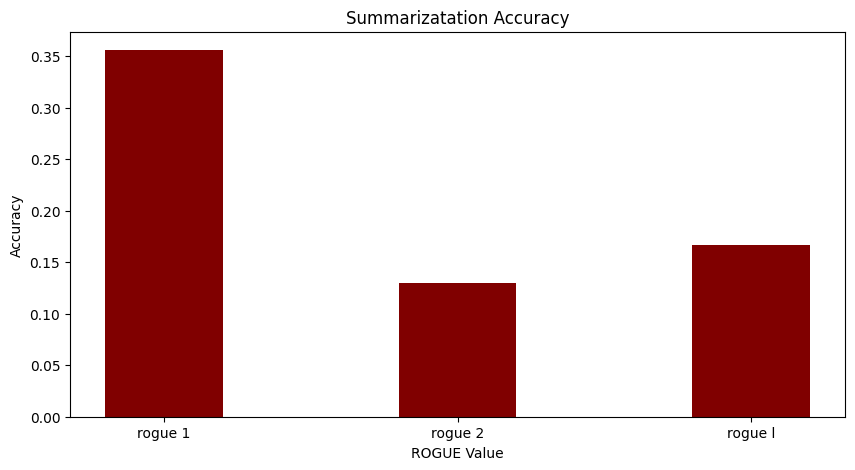

In [40]:
calculate_rogue(hand_summary, our_summary)